In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


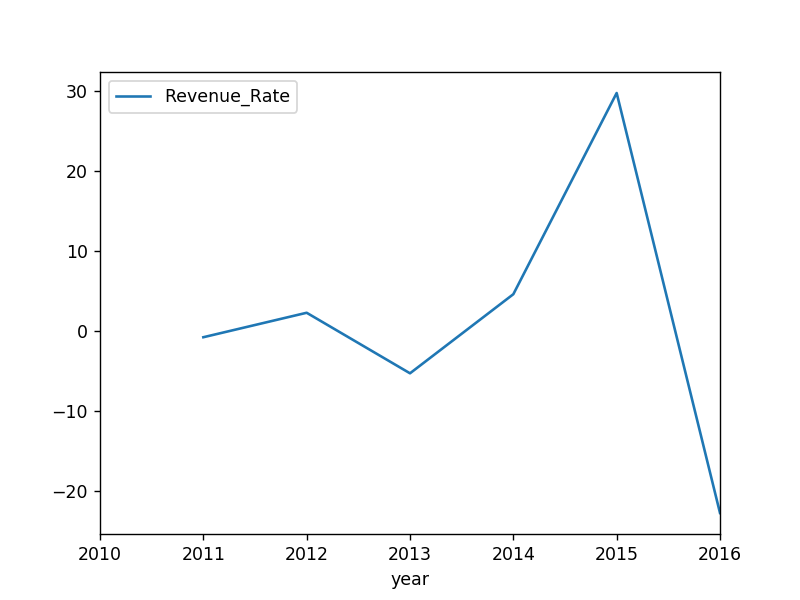

In [22]:
df1 = pd.read_csv('Financial_Metrics.csv')
df1 = df1.loc[(df1['variable'] == 'total_general_fund_revenue') | (df1['variable'] == 'total_general_fund_revenues')]
df1 = df1.groupby('year').sum()
df1 = df1['value']
df1 = df1.to_frame()
df1 = df1.rename(columns={'value':'Revenue'})
df1['Revenue_Rate'] = (df1['Revenue'] - df1['Revenue'].shift(1))/100000000
df1=df1.drop('Revenue',axis=1)
df1.plot();
#df1.plot(kind='bar');

In [23]:
df2 = pd.read_csv('Yearly_Unemployment_Rate.csv')
df2 = df2[['Year','Michigan Unemployment']]
df2['Michigan Unemployment'] = df2['Michigan Unemployment'].str.rstrip('%')
df2.set_index('Year',inplace=True)
df2.sort_index(inplace=True)
df2 = df2[10:]
df2 = df2.apply(pd.to_numeric)


<IPython.core.display.Javascript object>


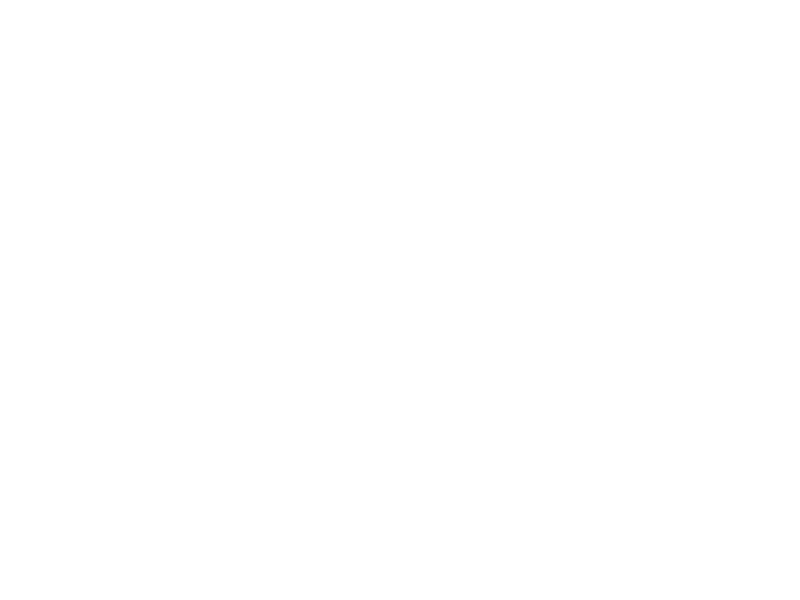

<IPython.core.display.Javascript object>


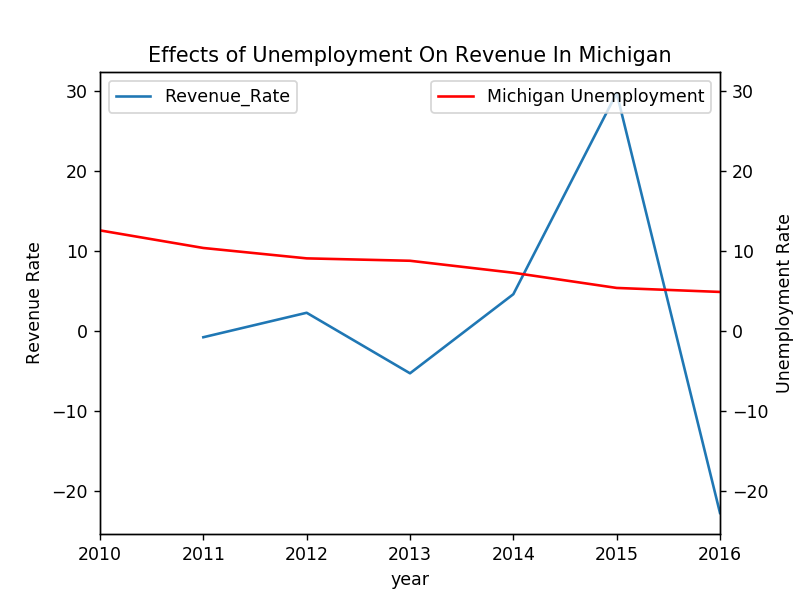

In [25]:
plt.figure()
fig, ax = plt.subplots(1,1)
df1.plot(ax=ax)
plt.ylabel('Revenue Rate')
#ax2 = ax.twinx()
ax1 = ax.twinx()
ax1.set_yticks(ax.get_yticks())
ax1.set_ylim(ax.get_ylim())


df2.plot(ax=ax1,color='red')
plt.legend()
plt.ylabel('Unemployment Rate')
plt.xlabel('Year')
plt.title('Effects of Unemployment On Revenue In Michigan')
#plt.show()


#ax1.set_yticklabels(map(lambda x: u'{:.0f}{}{}'.format((x/10*1.8)+32,t,'F'),ax1.get_yticks()))

In [57]:
df1 = pd.read_csv('Financial_Metrics.csv')
df1 = df1.loc[(df1['variable'] == 'total_general_fund_revenue') | (df1['variable'] == 'total_general_fund_revenues')]
df1 = df1.groupby('year').sum()
df1 = df1['value']
df1 = df1.to_frame()
df1 = df1.rename(columns={'value':'Revenue'})
df1['Revenue Rate'] = (df1['Revenue'] - df1['Revenue'].shift(1)).div(1000000)
df1

,Revenue,Revenue Rate
year,,
2010,1.644357e+10,NaN
2011,1.636678e+10,-76.796648
2012,1.659623e+10,229.451032
2013,1.606808e+10,-528.145025
2014,1.652964e+10,461.553993
2015,1.950883e+10,2979.192601
2016,1.723272e+10,-2276.105952


In [46]:
df1.iloc[0] 

Revenue    1.644357e+10
Name: 2010, dtype: float64

In [56]:
(df1.iloc[1] - df1.iloc[0])/1000000

Revenue        -76.796648
Revenue Rate          NaN
dtype: float64